*Alfred* Hofmann alfredh2
Daniel Lobo dclobo2
Aryan Shah aryans5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from dtaidistance import dtw
import numpy as np


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Task 1

##### Question 1

In [3]:
# Reading in data
ctl_clear_night = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0920_094847-data_fi_ghost_cutin-single_ctl.csv")
cvip_clear_night = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0920_094847-data_fi_ghost_cutin-single_cvip.csv")
traj_clear_night = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0920_094847-data_fi_ghost_cutin-single_traj.csv")
ctl_clear_noon = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0920_094223-data_fi_ghost_cutin-single_ctl.csv")
cvip_clear_noon = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0920_094223-data_fi_ghost_cutin-single_cvip.csv")
traj_clear_noon = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0920_094223-data_fi_ghost_cutin-single_traj.csv")
ctl_clear_sunset = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0920_094520-data_fi_ghost_cutin-single_ctl.csv")
cvip_clear_sunset = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0920_094520-data_fi_ghost_cutin-single_cvip.csv")
traj_clear_sunset = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0920_094520-data_fi_ghost_cutin-single_traj.csv")
ctl_rain_noon = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0920_094436-data_fi_ghost_cutin-single_ctl.csv")
cvip_rain_noon = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0920_094436-data_fi_ghost_cutin-single_cvip.csv")
traj_rain_noon = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0920_094436-data_fi_ghost_cutin-single_traj.csv")
ctl_haze_noon = pd.read_csv("campaign_results/route_highway_epoch24_haze-noon_fi_ghost_cutin/routes_fi_route_highway-0920_094629-data_fi_ghost_cutin-single_ctl.csv")
cvip_haze_noon = pd.read_csv("campaign_results/route_highway_epoch24_haze-noon_fi_ghost_cutin/routes_fi_route_highway-0920_094629-data_fi_ghost_cutin-single_cvip.csv")
traj_haze_noon = pd.read_csv("campaign_results/route_highway_epoch24_haze-noon_fi_ghost_cutin/routes_fi_route_highway-0920_094629-data_fi_ghost_cutin-single_traj.csv")
ctl_haze_sunset = pd.read_csv("campaign_results/route_highway_epoch24_haze-sunset_fi_ghost_cutin/routes_fi_route_highway-0920_094736-data_fi_ghost_cutin-single_ctl.csv")
cvip_haze_sunset = pd.read_csv("campaign_results/route_highway_epoch24_haze-sunset_fi_ghost_cutin/routes_fi_route_highway-0920_094736-data_fi_ghost_cutin-single_cvip.csv")
traj_haze_sunset = pd.read_csv("campaign_results/route_highway_epoch24_haze-sunset_fi_ghost_cutin/routes_fi_route_highway-0920_094736-data_fi_ghost_cutin-single_traj.csv")

In [4]:
# Displaying first 5 rows of the ctl.csv file for clear night
ctl_clear_night.head()

ts  agent_id  throttle     steer  brake
0  97541         0       0.9 -0.002598    0.0
1  97542         0       0.9 -0.011550    0.0
2  97543         0       0.9 -0.011520    0.0
3  97544         0       0.9 -0.009055    0.0
4  97545         0       0.9  0.000146    0.0

In [5]:
# Displaying first 5 rows of the cvip.csv file for clear night
cvip_clear_night.head()

ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  97541         0  500.491189  198.767441 -95.832657 -499.819366
1  97542         0    5.595580  195.567444 -90.832657    0.100000
2  97543         0    5.592365  195.567444 -90.832657    0.095407
3  97544         0    5.589578  195.567444 -90.832657    0.084691
4  97545         0    5.587154  195.567444 -90.832657    0.069311

In [6]:
# Displaying first 5 rows of the traj.csv file for clear night
traj_clear_night.head()

ts  agent_id           x         y         z    v
0  97541         0  192.362411 -86.26268  0.539326  0.0
1  97542         0  192.362411 -86.26268  0.491906  0.0
2  97543         0  192.362411 -86.26268  0.438374  0.0
3  97544         0  192.362411 -86.26268  0.378732  0.0
4  97545         0  192.362411 -86.26268  0.312981  0.0

##### Question 2

##### a)

In [7]:
# Finding duration by subtracting first timestamp from last time stamp, and dividing by 40 since there is 40fps
print("The duration for the clear night scene in seconds is:")
(ctl_clear_night["ts"].iloc[-1] - ctl_clear_night["ts"].iloc[0]) / 40

The duration for the clear night scene in seconds is:


20.4

In [8]:
print("The duration for the clear sunset scene in seconds is:")
(ctl_clear_sunset["ts"].iloc[-1] - ctl_clear_sunset["ts"].iloc[0]) / 40

The duration for the clear sunset scene in seconds is:


18.9

In [9]:
print("The duration for the clear noon scene in seconds is:")
(ctl_clear_noon["ts"].iloc[-1] - ctl_clear_noon["ts"].iloc[0]) / 40

The duration for the clear noon scene in seconds is:


18.8

In [10]:
print("The duration for the rain noon scene in seconds is:")
(ctl_rain_noon["ts"].iloc[-1] - ctl_rain_noon["ts"].iloc[0]) / 40

The duration for the rain noon scene in seconds is:


10.025

##### b)

In [11]:
# Here we are combing the ctl, cvip, and traj files for each weather condtion, making sure to only inlucde the timestamp oncce
clear_night_full = pd.concat([ctl_clear_night, cvip_clear_night.drop(columns = "ts"), traj_clear_night.drop(columns = "ts")], axis = 1)
clear_noon_full = pd.concat([ctl_clear_noon, cvip_clear_noon.drop(columns = "ts"), traj_clear_noon.drop(columns = "ts")], axis = 1)
clear_sunset_full = pd.concat([ctl_clear_sunset, cvip_clear_sunset.drop(columns = "ts"), traj_clear_sunset.drop(columns = "ts")], axis = 1)
rain_noon_full = pd.concat([ctl_rain_noon, cvip_rain_noon.drop(columns = "ts"), traj_rain_noon.drop(columns = "ts")], axis = 1)
haze_noon_full = pd.concat([ctl_haze_noon, cvip_haze_noon.drop(columns = "ts"), traj_haze_noon.drop(columns = "ts")], axis = 1)
haze_sunset_full = pd.concat([ctl_haze_sunset, cvip_haze_sunset.drop(columns = "ts"), traj_haze_sunset.drop(columns = "ts")], axis = 1)
# Creating a new column in each weather condition's dataframe stating the weather condition which will be helpfull later on
clear_night_full["weather"] = "clear night"
clear_noon_full["weather"] = "clear noon"
clear_sunset_full["weather"] = "clear sunset"
rain_noon_full["weather"] = "rain noon"
haze_noon_full["weather"] = "haze noon"
haze_sunset_full["weather"] = "haze sunset"

In [12]:
# creating a dataframe that now has the data for all the weather conditions
full = pd.concat([clear_night_full,clear_noon_full, clear_sunset_full, rain_noon_full, haze_sunset_full, haze_noon_full], axis = 0)

In [13]:
# subsetting this full dataset since the question only asks for statisitcs about 4 of the weather conditions
full_subset = full[full["weather"].isin(["clear night", "clear noon", "clear sunset", "rain noon"])]
# displaying statistics for the 4 weather conditions
full_subset[["throttle", "steer", "brake", "cvip", "x", "y", "v", "weather"]].groupby("weather").agg(["mean", "std"]).round(3)

throttle         steer         brake           cvip          \
                 mean    std   mean    std   mean    std    mean     std   
weather                                                                    
clear night     0.627  0.335  0.005  0.048  0.093  0.291  29.589  29.975   
clear noon      0.610  0.282  0.001  0.005  0.061  0.240  19.524  24.268   
clear sunset    0.610  0.281  0.000  0.005  0.057  0.232  20.054  24.637   
rain noon       0.646  0.271 -0.001  0.003  0.035  0.184   7.045  24.704   

                    x              y              v         
                 mean    std    mean     std   mean    std  
weather                                                     
clear night   191.283  1.185 -32.516  39.437  6.393  2.998  
clear noon    192.920  0.403 -31.332  40.564  6.930  3.284  
clear sunset  192.946  0.401 -31.226  40.397  6.882  3.315  
rain noon     192.633  0.253 -63.878  21.151  6.359  3.875

#### Question 3

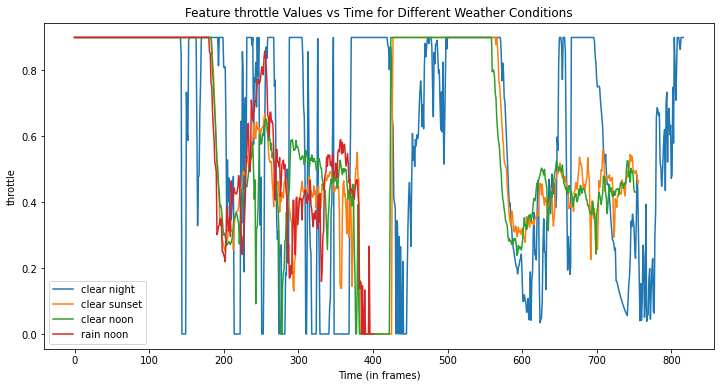

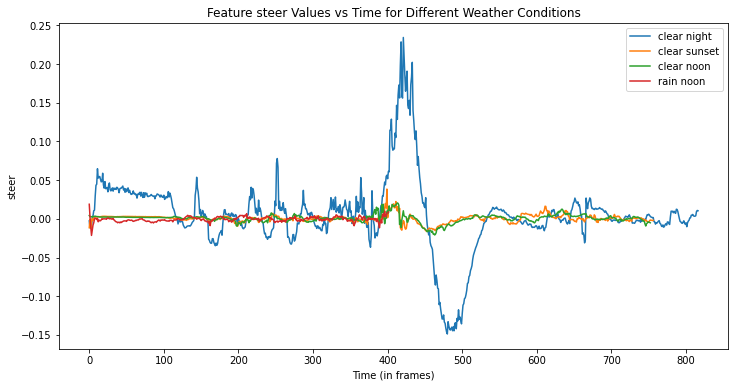

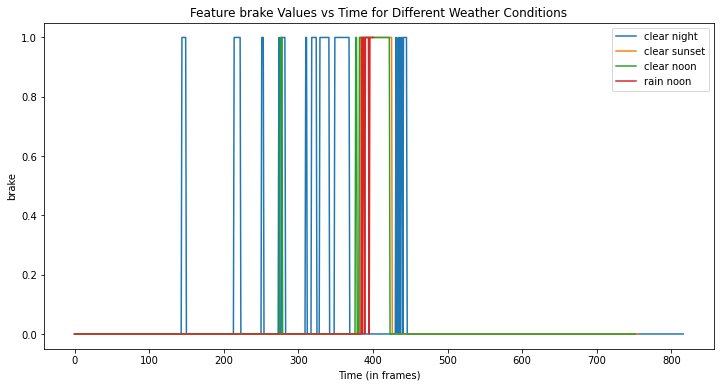

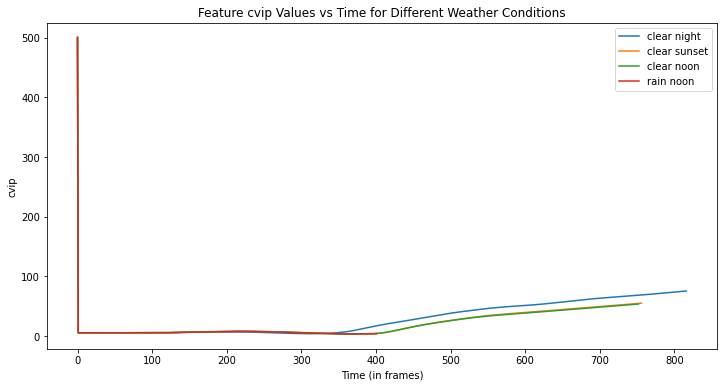

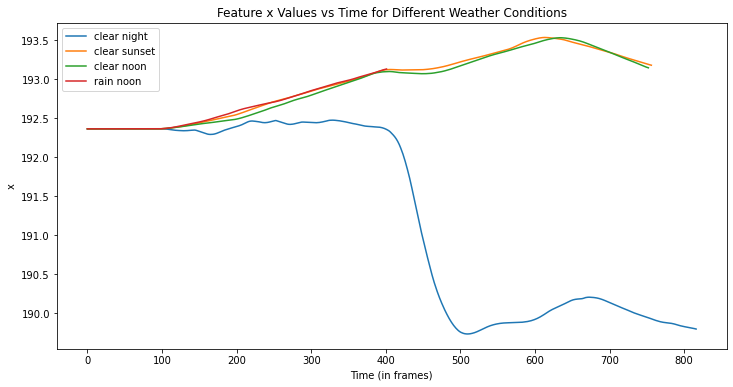

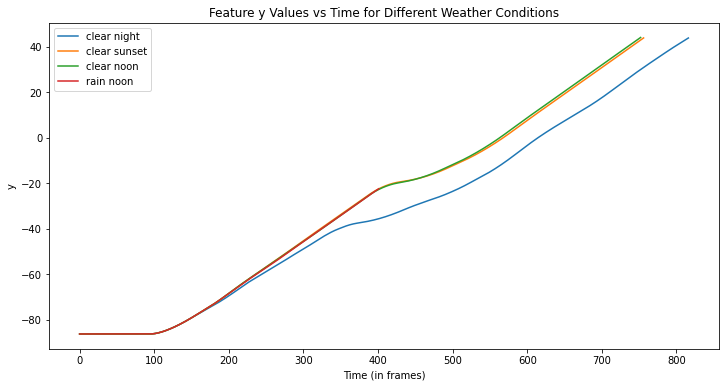

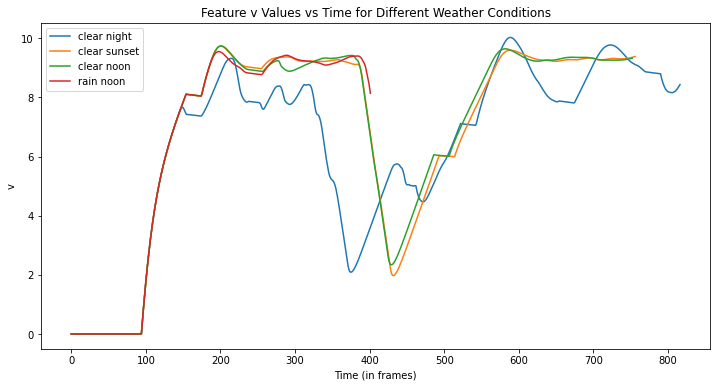

In [14]:

# looping through each of the features to create a graph for each feature
for features in ["throttle", "steer" ,"brake", "cvip", "x", "y", "v"] :

    # making graph larger
    plt.figure(figsize=(12, 6))
    # an array for each weather condition so we can loop though it and plot it on the same feature graph
    weather_conditions = ['clear night', 'clear sunset', 'clear noon', 'rain noon']

    # plotting each weather condition
    for condition in weather_conditions:
        subset = full[full['weather'] == condition]
        # we want to start at frame = 0 for easier interpretation
        plt.plot(subset['ts'] - subset['ts'].min(), subset[features], label=condition)

        
    plt.xlabel('Time (in frames)')
    plt.ylabel(f'{features}')
    plt.title(f'Feature {features} Values vs Time for Different Weather Conditions')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

#### Question 4

To start, we think brake feature will definitely change as an accident occurs as the driver will slam on the brake last minute to avoid a collision. Throttle will also decrease as the driver moves from the gas pedal onto the brake pedal. Steer could also change as the driver tries to avoid a potential collision. Speed (v) will also change assuming the driver slams on the brake. 

Based on the graphs, we think clear night could have an accident since their steer values change drastically and its speed also deaccelarate towards the end. It also appears the brake is heavily engaged at around the 450 frame mark. Rain noon could also have had an accident as the break is heavily engaged at around the 390 frame mark.

### Task 2

##### Question 1

Only rain noon had an accident while the 5 other weather condition scenarios were completed, so the probability of acident is 1/6.

##### Question 2

From the completion records, only the rain noon weather condition had a status of "Failed", which matches our guess from earlier. However, we also said that we thought clear night had an accdient, but there was no accident reported in the completion records. 

In [100]:
# duration of rain noon scene in seconds
(ctl_rain_noon["ts"].iloc[-1] - ctl_rain_noon["ts"].iloc[0]) / 40

10.025

The accident happened after 10.025 seconds. 

In [102]:
# looking at last 10 frames of rain noon scene
rain_noon_full.tail(10)

ts  agent_id  throttle     steer  brake  agent_id      cvip  \
392  84661         0  0.000000 -0.005356    1.0         0  3.719133   
393  84662         0  0.000000  0.004642    1.0         0  3.736587   
394  84663         0  0.000000  0.006492    1.0         0  3.758907   
395  84664         0  0.266604  0.003041    0.0         0  3.787119   
396  84665         0  0.000000  0.010010    1.0         0  3.821966   
397  84666         0  0.000000  0.002542    1.0         0  3.863874   
398  84667         0  0.000000  0.004383    1.0         0  3.912362   
399  84668         0  0.000000  0.006937    1.0         0  3.967788   
400  84669         0  0.000000  0.007972    1.0         0  4.030670   
401  84670         0  0.000000  0.008869    1.0         0  4.101400   

         cvip_x     cvip_y    cvip_z  agent_id           x          y  \
392  195.520096 -21.544838  0.001774         0  193.104660 -24.372660   
393  195.437469 -21.222475  0.001773         0  193.108017 -24.143894   
394  195.353439 -20.899858  0.001773         0  193.111481 -23.916803   
395  195.268158 -20.576958  0.001772         0  193.114670 -23.692036   
396  195.181778 -20.253780  0.001772         0  193.117599 -23.470228   
397  195.094452 -19.930393  0.001773         0  193.120407 -23.251780   
398  195.006317 -19.606899  0.001775         0  193.122925 -23.035944   
399  194.917572 -19.283451  0.001779         0  193.125427 -22.823294   
400  194.828323 -18.960222  0.001786         0  193.127823 -22.614470   
401  194.738693 -18.637394  0.001794         0  193.130081 -22.410028   

            z         v    weather  
392  0.034037  9.184584  rain noon  
393  0.034071  9.139005  rain noon  
394  0.034115  9.066123  rain noon  
395  0.034175  8.967294  rain noon  
396  0.034254  8.842638  rain noon  
397  0.034345  8.712745  rain noon  
398  0.034423  8.607469  rain noon  
399  0.034502  8.474167  rain noon  
400  0.034590  8.314835  rain noon  
401  0.034689  8.137177  rain noon

From the completion records, we see that the autonomous vehicle collided with another vehicle, speficially a Tesla. From the data under this weather condition of rain noon, we see the brake was engaged just before the accident. The steer values were also changing, so this could suggest that the vehicle was trying to swerve and brake to avoid an obstacle, but was unable to do so in time and eventually crashed.

##### Question 3

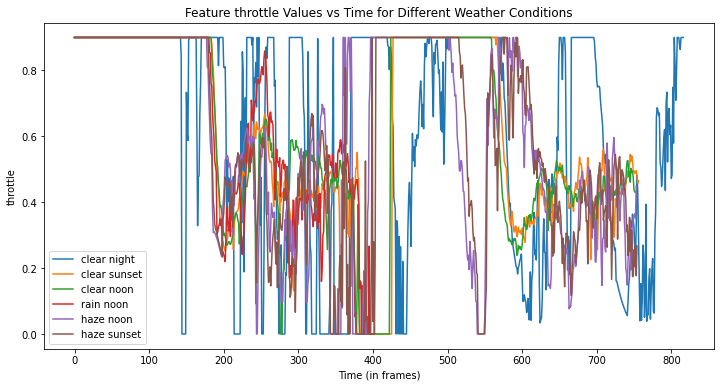

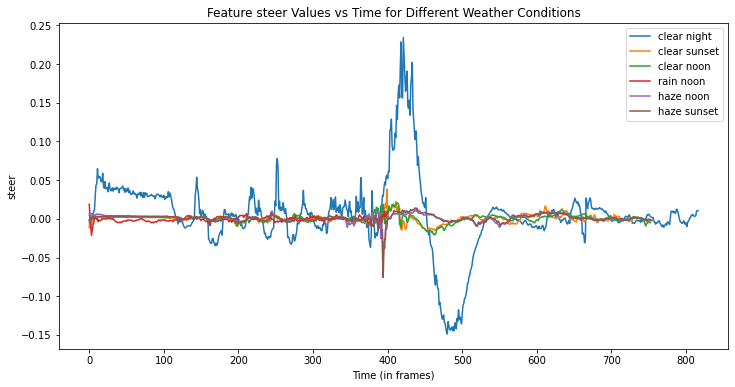

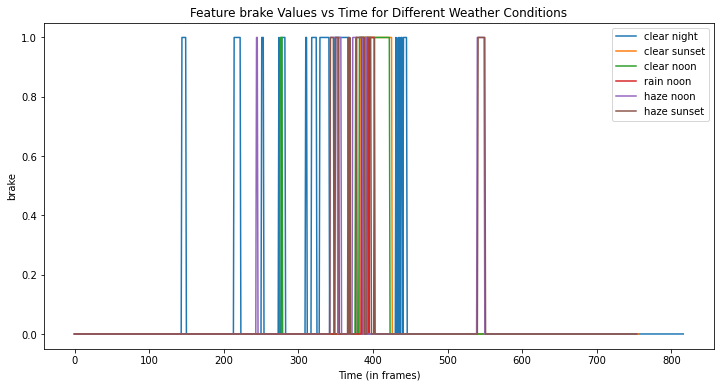

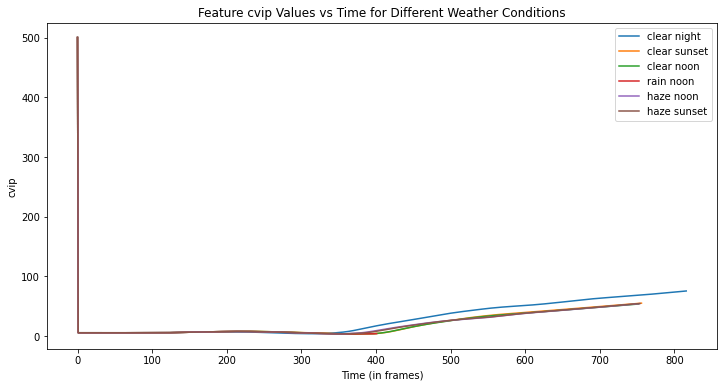

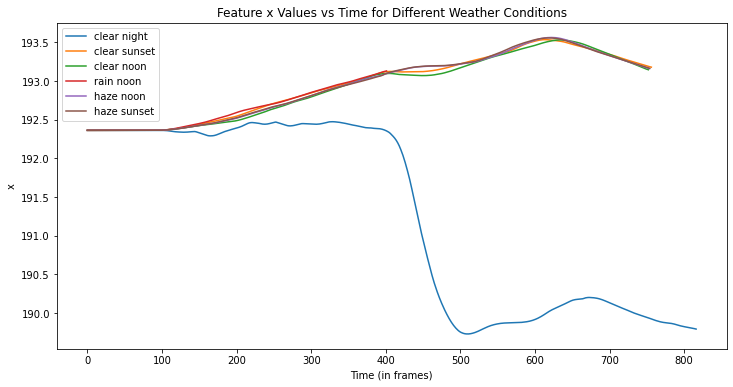

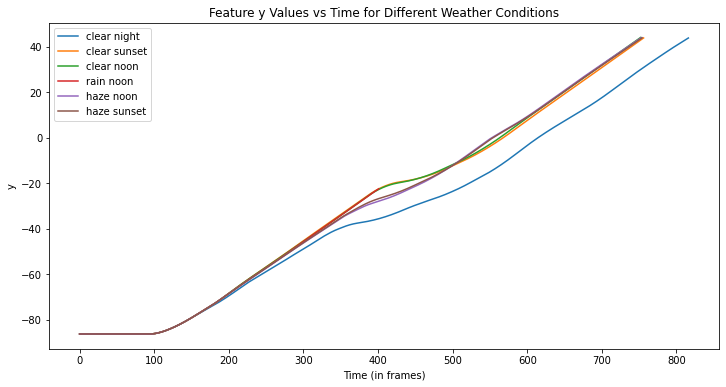

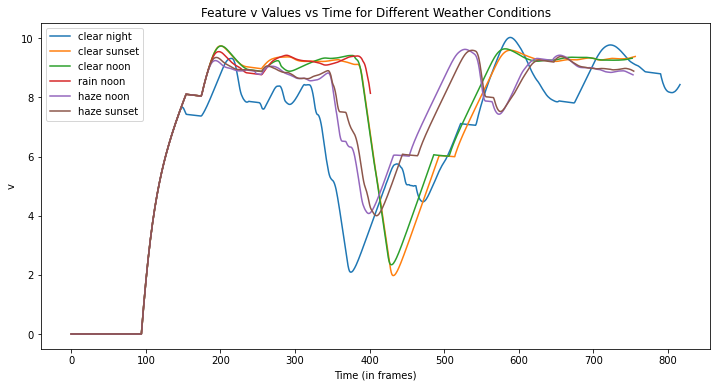

In [16]:
# regenerating feautre plots, but now for all 6 weather conditions

for features in ["throttle", "steer" ,"brake", "cvip", "x", "y", "v"] :


    plt.figure(figsize=(12, 6))


    weather_conditions = ['clear night', 'clear sunset', 'clear noon', 'rain noon', "haze noon", "haze sunset"]


    for condition in weather_conditions:
        subset = full[full['weather'] == condition]
        plt.plot(subset['ts'] - subset['ts'].min(), subset[features], label=condition)

        
    plt.xlabel('Time (in frames)')
    plt.ylabel(f'{features}')
    plt.title(f'Feature {features} Values vs Time for Different Weather Conditions')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

It appears in the clear night weather condition, the autonomus vehicle displays abnormal behavior with the steer feature as it displays a large range of values from the 400-600 frame mark. From the brake feature graph, we see that the vehicle brakes much more often compared to the vehicles in the others weather conditions. The throttle values are also much more over the place, so while the vehicle did not crash, it did have abnormal behavior with respecgt to steer, brake, and throttle. This abnormal behavior could be due to needing to avoid obstacles. This weather condition was at night, so the sensors of the vehicles may have more trouble accurately identifying the surrounding environment.

##### Question 4

##### a)

The abnormal runs will be the clear night weather condition as explained above and rain noon condition since an accident occured.

In [18]:
# creating two separate dataframes for the abnormal and normal weather condition behaviors
abnormal = full[(full["weather"] == "rain noon") | (full["weather"] == "clear night")]
normal_weathers = ["clear noon", "clear sunset", "haze noon", "haze sunset"]
normal = full[full["weather"].isin(normal_weathers)]
# creating an additional column stating normality which will be usfeull when we recombine the two dataframes
abnormal["abnormal/normal"] = "abnormal"
normal["abnormal/normal"] = "normal"
# dataframe that has all abnormal and normal observations
abnormal_normal = pd.concat([abnormal, normal], axis = 0).reset_index()

/var/folders/f1/gr87dbvs097dkf58355yvlbh0000gn/T/ipykernel_4533/3865983790.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal["abnormal/normal"] = "abnormal"
/var/folders/f1/gr87dbvs097dkf58355yvlbh0000gn/T/ipykernel_4533/3865983790.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["abnormal/normal"] = "normal"


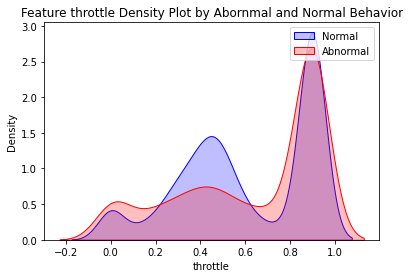

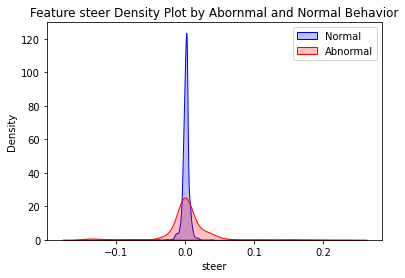

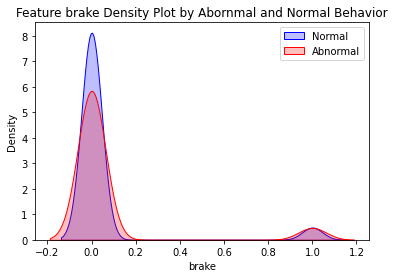

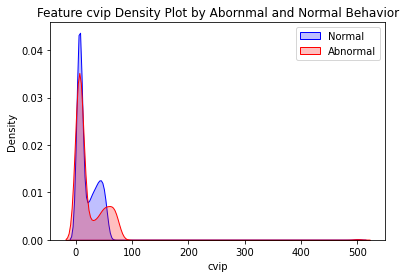

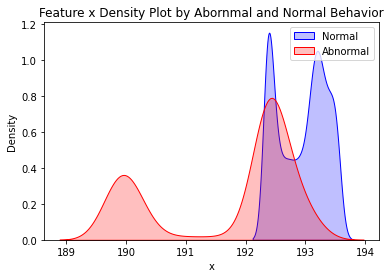

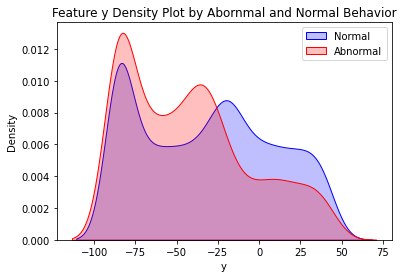

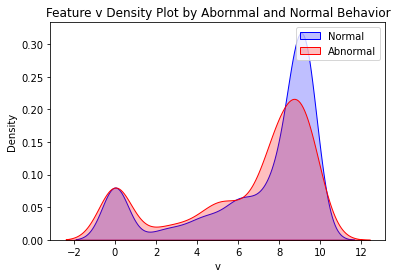

In [22]:
# Generating plots for each feature sepearate by normality behavior
for features in ["throttle", "steer" ,"brake", "cvip", "x", "y", "v"] :

    sns.kdeplot(abnormal_normal[abnormal_normal['abnormal/normal'] == 'normal'][features], label='Normal', color='blue', fill=True)
    sns.kdeplot(abnormal_normal[abnormal_normal['abnormal/normal'] == 'abnormal'][features], label='Abnormal', color='red', fill=True)
    plt.xlabel(f'{features}')
    plt.title(f'Feature {features} Density Plot by Abornmal and Normal Behavior')
    plt.legend()
    plt.show()

The distribution for steer across the abnormal behavior weather conditions had a much higher variance than the accross the normal behavior weather conditions. They both seem to be centered around 0.

##### b)

$$H_0: \mu_{\text{normal}} = \mu_{\text{abnormal}}$$
$$H_A: \mu_{\text{normal}} \neq \mu_{\text{abnormal}}$$

In [106]:
# variance of steer for abnormal
abnormal["steer"].var()

0.001555518990185267

In [23]:
# variance of steer for normal
normal["steer"].var()

2.5993468423034434e-05

The variances appear to be unequal, so we will utilize Welch's Test

In [24]:
# performing t test
t_stat, p_value = stats.ttest_ind(normal["steer"], abnormal["steer"], equal_var=False)

In [25]:
# t statistic
t_stat

-2.299749049586441

In [26]:
# the p value
p_value

0.02162866831543605

Since the p value of .02 is less than the level of significance of .05, we reject the null hypothesis. This suggests the mean steer value for normal runs is different than abnormal runs.

#### c)

Yes, the testing result contradicts our observation on the “steer” feature in part 4a where we said the mean seems to be centered around the same value. This is because sometimes it is not easy to tell if there is a statistically significant difference just by looking at the plot, which is why doing the t-test is important.

#### Question 5

#### a)

We identified steer, brake, and throttle to be the best indicators of abnormal AV behavior. Based on the plots, these three seemed to have the highest variance and differences in local maxima when comparing the distributions of the features between normal and abnormal AV behavior.

#### b)

In [27]:
# Perason coefficient values
abnormal_normal[["steer", "brake", "throttle"]].corr(method="pearson")

steer     brake  throttle
steer     1.000000  0.081876 -0.012624
brake     0.081876  1.000000 -0.525948
throttle -0.012624 -0.525948  1.000000

There is no strong correlation between any pairs of these indicators, 
although there is moderate negative correlation between brake and throttle. 
This might introduce some minor multicollinearity issues which can reduce predictive power when using all the indicators vs just one, although not much since the correlation between these two indicators still isn’t that strong.


##### Question 6

#### a)

$$H_0: F_{\text{normal}} = F_{\text{abnormal}}$$
$$H_A: F_{\text{normal}} \neq F{_\text{abnormal}}$$

#### b)

We will use steer since it appears the distriubtion for abnormal has much more variance, so it is likely that it is a completely different distribution. 

In [28]:
# performing test
ks_statistic, p_value = stats.ks_2samp(normal["steer"], abnormal["steer"])

In [30]:
# statistics
ks_statistic

0.23531796570856547

In [31]:
# p value
p_value

2.220446049250313e-16

#### c)

Since the p value is much lower than the level of significance of .05, we reject the null hyptohesis and can conclude that the steer distribution is significantly different for abnormal and normal behavior.

#### d)

In [37]:
# performing test using cvip as a potential indicator
ks_statistic, p_value = stats.ks_2samp(normal["cvip"], abnormal["cvip"])

In [38]:
# statistic
ks_statistic

0.15073905734015441

In [39]:
# p value
p_value

2.220446049250313e-16

The p value is also much lower here, so we reject the null hypothesis and can conclude that the cvip distribution is significantly different for abnormal and normal behavior. 

#### e)

The KS test is used to compare overall distributions including shape, spread, or location, whereas the      t-test is used to compare just whether there is a significant difference in their average values.


#### 7)

When making a KS two-sample test, we had to assume that the samples we are comparing (normal and abnormal) are independent / unrelated of each other

The situation may fail in cases of if the experiment is executing over a longer period of time, other inevitable factors such as weather changes or sensor issues do to wear and tear may occur. These situations assume that there does exist correlation between the current time and prior time values.


#### 8)

In [40]:
# converting to numpy array
clear_noon_steer = np.array(clear_noon_full["steer"])
clear_sunset_steer = np.array(clear_sunset_full["steer"])
clear_night_steer = np.array(clear_night_full["steer"])

In [41]:
# calculating distance
clear_night_dist = dtw.distance(clear_noon_steer, clear_night_steer)
clear_sunset_dist = dtw.distance(clear_noon_steer, clear_sunset_steer)

In [44]:
# clear night compared to clear noon
clear_night_dist

1.139599561158835

In [45]:
# clear sunset compared to clear noon
clear_sunset_dist

0.05509414750871723

We can say that the DTW distance is much lower for clear sunset than for clear night with respect to the reference (clear noon).